<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Вывод-по-разделу-1" data-toc-modified-id="Вывод-по-разделу-1-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод по разделу 1</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Вывод-по-разделу-2" data-toc-modified-id="Вывод-по-разделу-2-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод по разделу 2</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Разделение-данных-на-выборки" data-toc-modified-id="Разделение-данных-на-выборки-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Разделение данных на выборки</a></span><ul class="toc-item"><li><span><a href="#Выборки-для-работы-с-моделями,-поддерживающими-обработку-категориальных-признаков" data-toc-modified-id="Выборки-для-работы-с-моделями,-поддерживающими-обработку-категориальных-признаков-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Выборки для работы с моделями, поддерживающими обработку категориальных признаков</a></span></li><li><span><a href="#Выборки-для-работы-с-моделями,-не-поддерживающими-обработку-категориальных-признаков" data-toc-modified-id="Выборки-для-работы-с-моделями,-не-поддерживающими-обработку-категориальных-признаков-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Выборки для работы с моделями, не поддерживающими обработку категориальных признаков</a></span></li></ul></li><li><span><a href="#CatBoostRegressor" data-toc-modified-id="CatBoostRegressor-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>CatBoostRegressor</a></span></li><li><span><a href="#LGBMRegressor" data-toc-modified-id="LGBMRegressor-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>LGBMRegressor</a></span></li><li><span><a href="#RandomForestRegressor" data-toc-modified-id="RandomForestRegressor-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>RandomForestRegressor</a></span></li><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>LinearRegression</a></span></li><li><span><a href="#Вывод-по-разделу-3" data-toc-modified-id="Вывод-по-разделу-3-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Вывод по разделу 3</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#Проверка-модели-на-адекватность" data-toc-modified-id="Проверка-модели-на-адекватность-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Проверка модели на адекватность</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Дополнение.-Кросс-валидация-на-временных-рядах" data-toc-modified-id="Дополнение.-Кросс-валидация-на-временных-рядах-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Дополнение. Кросс-валидация на временных рядах</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

**Задача. На основе исторических данных о заказах такси построить модель для прогнозирования количества заказов такси на следующий час. Значение метрики *RMSE* на тестовой выборке должно быть не больше 48**

столбец 'num_orders' - число заказов

## Подготовка

In [84]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

In [2]:
pd.options.mode.chained_assignment = None

In [3]:
data = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])

In [4]:
data.sort_index(inplace=True)

In [5]:
#первые пять строк датасета
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


In [6]:
#общая информация о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


In [7]:
print('Данные охватывают период времени с', data.index.min(),'по', data.index.max())

Данные охватывают период времени с 2018-03-01 00:00:00 по 2018-08-31 23:50:00


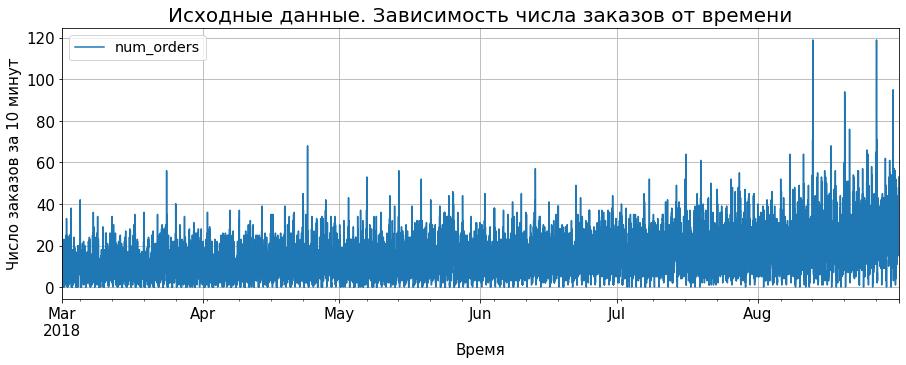

In [8]:
#график необработанных данных
data.plot(figsize=(15,5), grid=True) 

plt.xlabel('Время', size = 15)
plt.ylabel('Число заказов за 10 минут', size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.title('Исходные данные. Зависимость числа заказов от времени', size = 20)
plt.legend(loc='upper left', fontsize='x-large') 
    
plt.show()

In [9]:
#Проверим ряд на стационарность можно с помощью теста Дики-Фулера

ts = data['num_orders']
st_test = adfuller(ts, regression='ctt')

print('Если значение с индексом 1 меньше P-Value (0.05), то ряд стационарный')
if st_test[1] < 0.05:
    print('Наш ряд стационарный')
else:
    print('Ряд нестационарный')

Если значение с индексом 1 меньше P-Value (0.05), то ряд стационарный
Наш ряд стационарный


### Вывод по разделу 1

В разделе была проведена загрузка данных и первичное ознакомление с ними. Количество строк в датасете составило 26496 строк. Данные охватывают период времени с 2018-03-01 00:00:00 по 2018-08-31 23:50:00. Данные имеют шаг по времени равный 10 минутам  

## Анализ

Проведем изменение интервала со значениями временного ряда - ресемплирование. Новое значение интервала выберем 1 час

In [10]:
data = data.resample('1H').sum()

In [11]:
#определим количество строк после ресемплирования
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB


Размер датасета сократился до 4416 строк

Создадим дополнительные столбцы в data (час, день месяца, день недели, номер месяца)

In [12]:
data['hour'] = data.index.hour
data['day'] = data.index.day
data['dayofweek'] = data.index.dayofweek
data['month'] = data.index.month

In [13]:
#проверка добавления столбцов 
data.head()

,num_orders,hour,day,dayofweek,month
datetime,,,,,
2018-03-01 00:00:00,124,0,1,3,3
2018-03-01 01:00:00,85,1,1,3,3
2018-03-01 02:00:00,71,2,1,3,3
2018-03-01 03:00:00,66,3,1,3,3
2018-03-01 04:00:00,43,4,1,3,3


Посмотрим, как зависит число заказов в течении суток от дня недели

In [14]:
data_h_dw = pd.pivot_table(data, index='hour', columns='dayofweek', values='num_orders', aggfunc='mean') 

In [15]:
dict_day = {0:'Понедельник', 1:'Вторник', 2:'Среда', 3:'Четверг', 4:'Пятница', 5:'Суббота', 6:'Воскресение'}

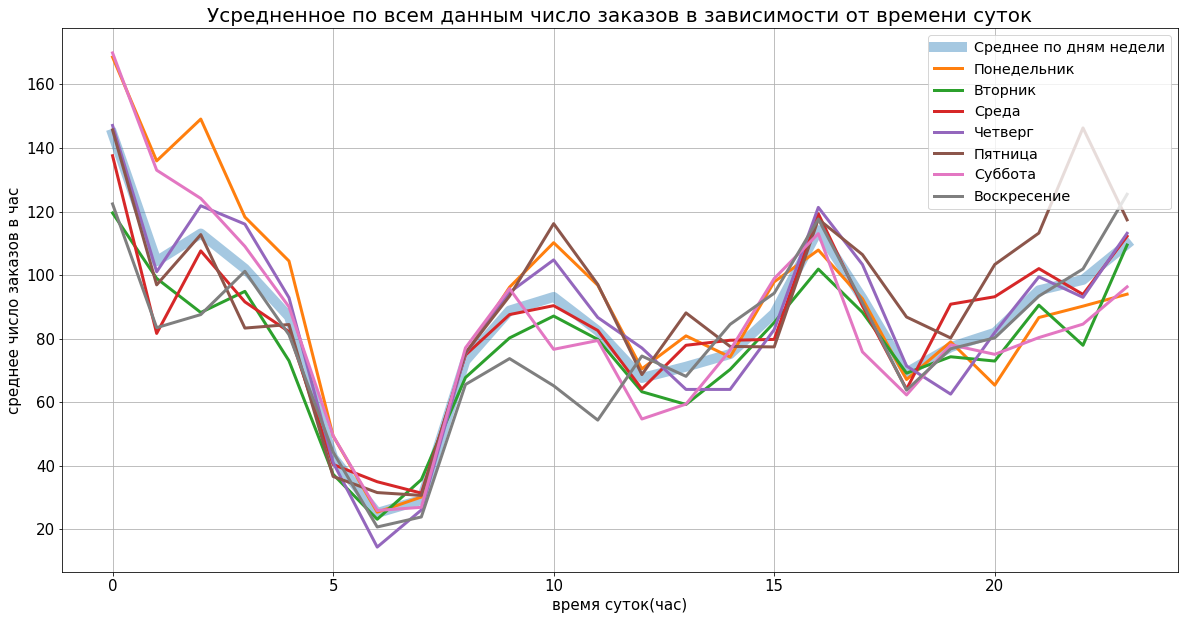

In [16]:
plt.figure(figsize=(20, 10))

data.groupby('hour')['num_orders'].mean().plot(grid=True, linewidth = 10, alpha=0.4,\
                                               label='Среднее по дням недели')

for day in list(range(0,7)):
    data_h_dw[day].plot(figsize=(20,10), grid=True, label=dict_day[day], linewidth = 3) 

plt.xlabel('время суток(час)', size = 15)
plt.ylabel('среднее число заказов в час', size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.title('Усредненное по всем данным число заказов в зависимости от времени суток', size = 20)
plt.legend(loc='upper right', fontsize='x-large') 
    
plt.show()

Из графика видно, что количество заказаов достигает пика в районе 00:00, 10:00, 17:00. Количество "ночных заказов" минимально для воскресения и вторника, а максимально для субботы и понедельника(!?). Кривые числа заказов от времени суток имеют схожие суточные изменения (суточная сезонность)

Посмотрим, как зависит число заказов в течении суток от месяца

In [17]:
data_m_dw = pd.pivot_table(data, index='hour', columns='month', values='num_orders', aggfunc='mean') 

In [18]:
dict_month = {3:'Март', 4:'Апрель', 5:'Май', 6:'Июнь', 7:'Июль', 8:'Август'}

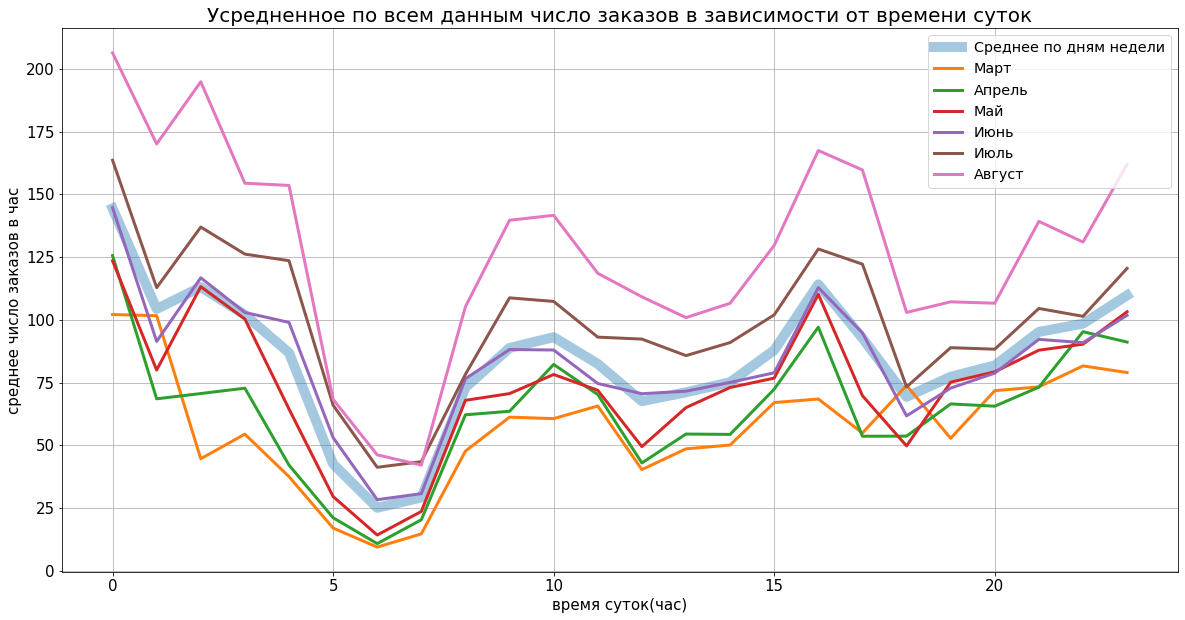

In [19]:
plt.figure(figsize=(20, 10))

data.groupby('hour')['num_orders'].mean().plot(grid=True, linewidth = 10, alpha=0.4,\
                                               label='Среднее по дням недели')

for month in list(range(3,9)):
    data_m_dw[month].plot(figsize=(20,10), grid=True, label=dict_month[month], linewidth = 3) 

plt.xlabel('время суток(час)', size = 15)
plt.ylabel('среднее число заказов в час', size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.title('Усредненное по всем данным число заказов в зависимости от времени суток', size = 20)
plt.legend(loc='upper right', fontsize='x-large') 
    
plt.show()

Из графика видно, что среднее число заказов возрастает от марта к августу. При этом, положение экстремумов количества заказов по времени в течении суток сохраняется 

Воспользуемся seasonal_decompose и посмотрим графики сезонности, шума и тренда

In [20]:
decomposed = seasonal_decompose(data['num_orders'])

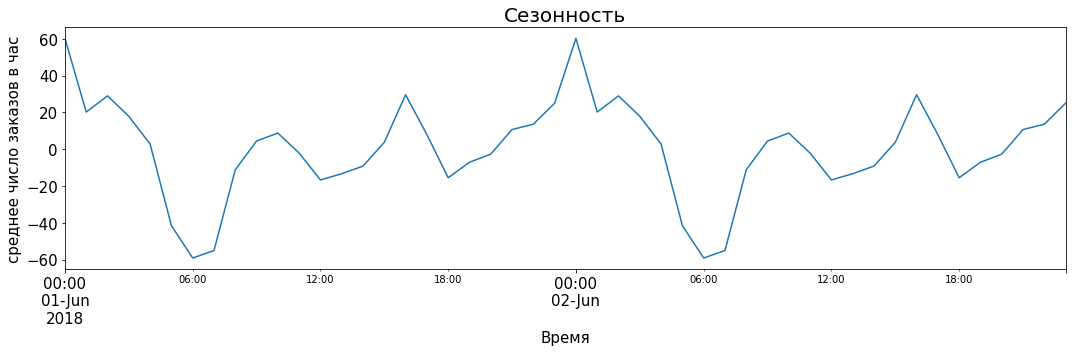

In [21]:
plt.figure(figsize=(15, 5))

#чтобы лучше рассмотреть особенности, установим период с 2018-06-01 по 2018-06-02 
decomposed.seasonal['2018-06-01':'2018-06-02'].plot(ax=plt.gca())

plt.xlabel('Время', size = 15)
plt.ylabel('среднее число заказов в час', size = 15)
plt.title('Сезонность', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.tight_layout()

На графике сезонности выделяются три пика количества заказов (в районе 00:00, 09:00, 17:00). Аналогичные данные по пикам загруженности были получены на графиках усредненного числа заказаов в зависимости от дня недели и времени суток

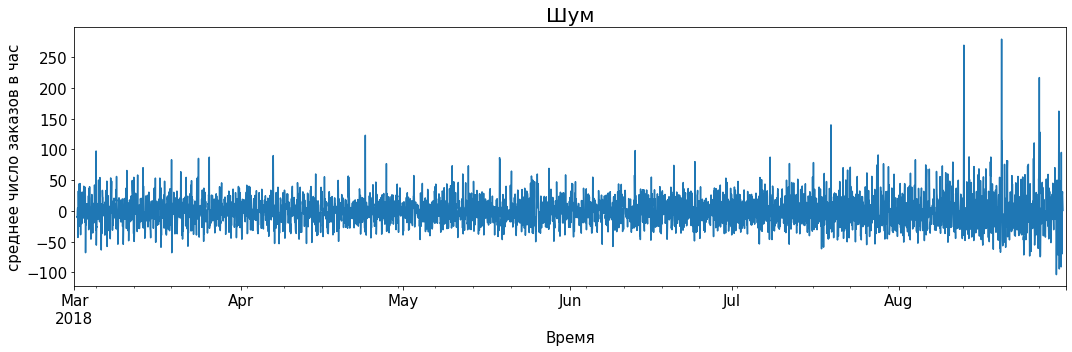

In [22]:
plt.figure(figsize=(15, 5))

#чтобы лучше рассмотреть особенности, установим период с 2018-06-01 по 2018-06-02 
decomposed.resid.plot(ax=plt.gca())

plt.xlabel('Время', size = 15)
plt.ylabel('среднее число заказов в час', size = 15)
plt.title('Шум', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.tight_layout()

Амплитуда шума в выбранном интервале составляет более 40 вызова в час

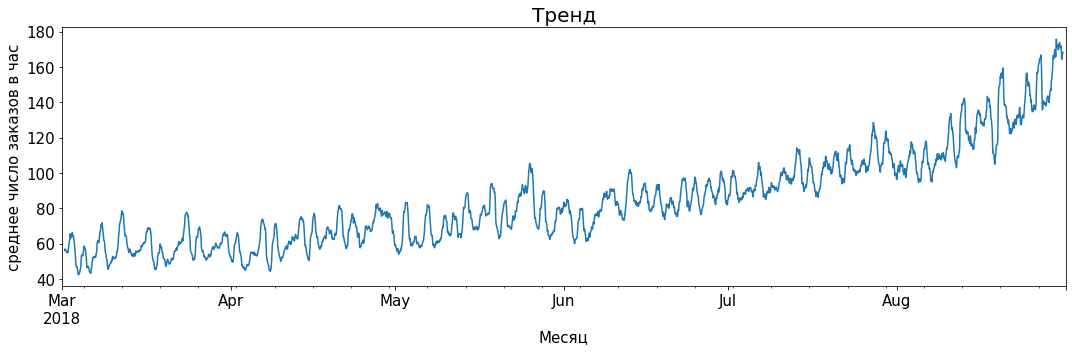

In [23]:
plt.figure(figsize=(15, 5))

decomposed.trend.plot(ax=plt.gca())

plt.xlabel('Месяц', size = 15)
plt.ylabel('среднее число заказов в час', size = 15)
plt.title('Тренд', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.tight_layout()

На графике тренда видно увеличение среднего числа заказов от марта к августу. Аналогичные данные были получены на графиках усредненного числа заказаов в зависимости от месяца и времени суток.
  
Поскольку перед нами поставлена задача прогнозирования загрузки только на один час, то для уменьшения влияния на модель тренда удалим столбец месяц и день месяца

In [24]:
data = data.drop(['month', 'day'], axis=1)

Для создания признаков необходимо определить ширину окна скользящего среднего и количество отстающих значений. Создадим функцию, которая подберет наилучшее сочетание данных параметров. Оценку качества будем производить с помощью LinearRegression измеряя RMSE

In [25]:
#создаем функцию для определения RMSE
def def_rmse(target,predicted):
    return mean_squared_error(target, predicted)**0.5

In [26]:
#функция, которая возвращает список RMSE, максимальное число отстающих значений и окно скользящего среднего

def parameters (data, max_lag, rolling_mean_size):
    #создадим столбцы с лагами и со скользящим средним
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)
    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()
    #удалим пропуски
    data = data.dropna()
    
    #создадим признаки и целевые признаки
    features = data.drop('num_orders', axis=1)
    target = data['num_orders']
    
    #Разделим данные в пропорции 20:80
    features_train, features_test, target_train, target_test = train_test_split(features,\
    target, test_size=0.2, shuffle=False, random_state=12345)
    
    #стандартизируем признаки
    scaler = StandardScaler()
    scaler.fit(features_train)
    features_train = scaler.transform(features_train)
    features_test = scaler.transform(features_test)
    
    #определим RMSE для заданных параметров с помощью LinearRegression
    
    lr = LinearRegression()
    lr.fit(features_train, target_train)
    predictions_lr = lr.predict(features_test)
    rmse = def_rmse(target_test, predictions_lr)
    
    return [round(rmse,5), max_lag, rolling_mean_size]

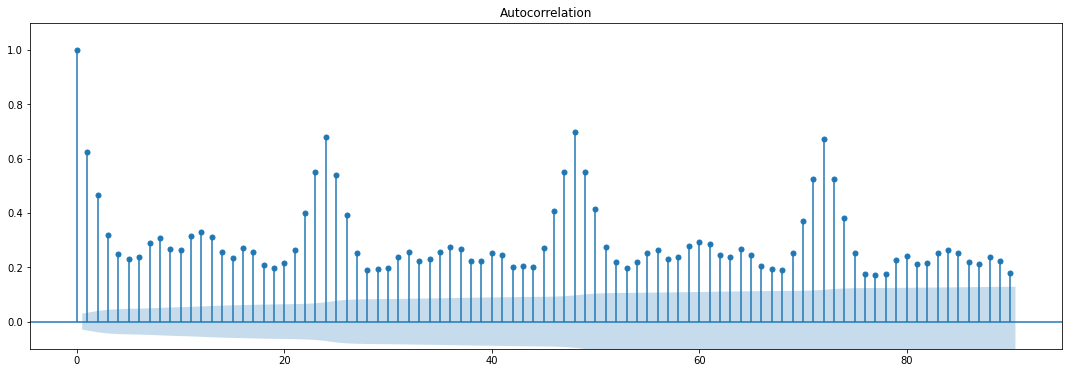

In [27]:
#Построим график автокорреляции
from statsmodels.graphics import tsaplots

fig = tsaplots.plot_acf(data['num_orders'],lags= 90)
fig.set_size_inches(18.5, 6)
plt.ylim(-.1, 1.1)
plt.show() 




In [28]:
#функция сортирующая датафрейм из строк со значениями 'rmse', 'max_lag', 'rolling_mean_size'
#на вход функции подаются df и диапазон поиска отстающих значений и окна скользящего среднего

def selection_param (data, min_lag, max_lag, min_rolling_mean_size, max_rolling_mean_size):
    param = []
    for max_lag in range(min_lag, max_lag+1):
        for max_rolling in range(min_rolling_mean_size, max_rolling_mean_size+1):
            param.append(parameters(data, max_lag, max_rolling))
    return pd.DataFrame(param, columns=('rmse', 'max_lag', 'rolling_mean_size')).sort_values('rmse')  

Определим лучшее количество отстающих значений и окно скользящего среднего

In [29]:
%%time
df =data.copy()
selection_param(df,2, 24, 2, 6).head()

CPU times: user 5.62 s, sys: 9.28 s, total: 14.9 s
Wall time: 14.9 s


,rmse,max_lag,rolling_mean_size
111,40.41951,24,3
113,40.41975,24,5
112,40.42232,24,4
110,40.42303,24,2
114,40.42588,24,6


Создадим столбцы с новыми признаками

In [30]:
for lag in range(1, 168):
    data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)
data['rolling_mean'] = data['num_orders'].shift().rolling(3).mean()

Построим график числа заказов и скользящего среднего

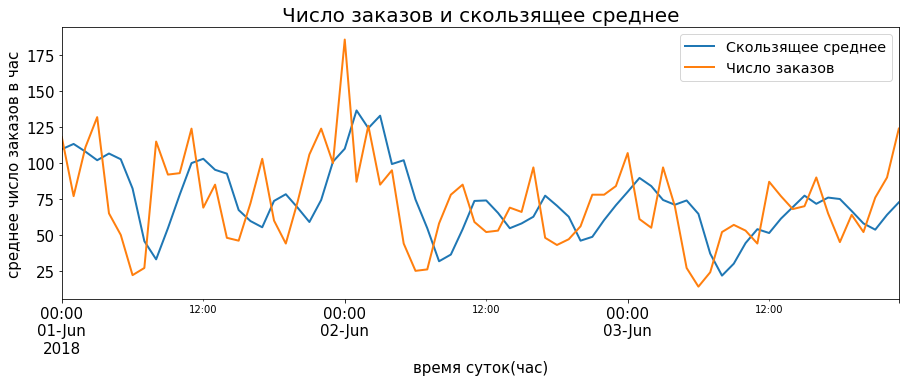

In [31]:
plt.figure(figsize=(15, 5))

data['rolling_mean']['2018-06-01':'2018-06-03'].plot(linewidth = 2, label='Скользящее среднее')
data['num_orders']['2018-06-01':'2018-06-03'].plot(linewidth = 2, label='Число заказов')
plt.xlabel('время суток(час)', size = 15)
plt.ylabel('среднее число заказов в час', size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.title('Число заказов и скользящее среднее', size = 20)
plt.legend(loc='upper right', fontsize='x-large') 
    
plt.show()

In [32]:
#удалим пропуски
data = data.dropna()

### Вывод по разделу 2

В разделе 2 было проведено следующее:
1) проведено ресемплирование данных до 1 часа;  
2) построен график зависимости числа заказов от времени суток для разных дней недели. Количество заказаов достигает пика в районе 00:00, 10:00, 17:00. Количество "ночных заказов" минимально для воскресения и вторника, а максимально для субботы и понедельника. Кривые числа заказов от времени суток для различных дней недели имеютсхожие суточные изменения (суточная сезонность).  
3) построен график зависимости числа заказов от времени суток для разных месяцев. Из графика видно, что среднее число заказов возрастает от марта к августу. При этом, положение экстремумов количества заказов по времени в течении суток сохраняется.  
4) построены графики тренда, сезонности и шума.  
- На графике тренда видно увеличение среднего числа заказов от марта к августу. Аналогичные данные были получены на графиках усредненного числа заказаов в зависимости от месяца и времени суток.  
- На графике сезонности выделяются три пика количества заказов (в районе 00:00, 09:00, 17:00). Аналогичные данные по пикам загруженности были получены на графиках усредненного числа заказаов в зависимости от дня недели и времени суток.  
- Амплитуда шума в выбранном интервале составляет более 40 вызова в час.  
  
5) Для создания признаков оптимальная ширина окна скользящего среднего и количество отстающих значений(3 и 168 часа соответственно).  
6) Для уменьшения влияния на модель удалены столбцы месяц и день месяца, в связи с задачей прогнозирования загрузки только на один час.  
7) Данные очищены от пропусков  

## Обучение

In [33]:
#создадим признаки и целевые признаки
features = data.drop('num_orders', axis=1)
target = data['num_orders']

In [34]:
#Категориальные признаки
cat_columns =['hour', 'dayofweek']

In [35]:
#количественные признаки
num_columns = list(set(list(features))-set(cat_columns))

### Разделение данных на выборки

#### Выборки для работы с моделями, поддерживающими обработку категориальных признаков

In [36]:
#Разделим данные в пропорции 20:80
features_train_valid_cat, features_test_cat, target_train_valid_cat, target_test_cat = \
train_test_split(features, target, test_size=0.1, random_state=12345, shuffle=False)

In [37]:
#Разделим данные в пропорции 20:80
features_train_cat, features_valid_cat, target_train_cat, target_valid_cat = \
train_test_split(features_train_valid_cat, target_train_valid_cat, test_size=0.1,\
                 random_state=12345, shuffle=False)

In [38]:
#стандартизируем признаки
scaler = StandardScaler()
scaler.fit(features_train_valid_cat[num_columns])

features_train_valid_cat[num_columns] = scaler.transform(features_train_valid_cat[num_columns])
features_train_cat[num_columns] = scaler.transform(features_train_cat[num_columns])
features_valid_cat[num_columns] = scaler.transform(features_valid_cat[num_columns])
features_test_cat[num_columns] = scaler.transform(features_test_cat[num_columns])

In [39]:
#Проверка корректности проведенного разделения
print('Размер обучающей выборки features_train_cat',features_train_cat.shape[0])
print('Размер обучающей выборки target_train_cat  ',target_train_cat.shape[0])
print('Размер валидационной выборки features_valid_cat',features_valid_cat.shape[0])
print('Размер валидационной выборки target_valid_cat  ',target_valid_cat.shape[0])
print('Размер тестовой выборки features_test_cat',features_test_cat.shape[0])
print('Размер тестовой выборки target_test_cat  ',target_test_cat.shape[0])

Размер обучающей выборки features_train_cat 3441
Размер обучающей выборки target_train_cat   3441
Размер валидационной выборки features_valid_cat 383
Размер валидационной выборки target_valid_cat   383
Размер тестовой выборки features_test_cat 425
Размер тестовой выборки target_test_cat   425


#### Выборки для работы с моделями, не поддерживающими обработку категориальных признаков

In [40]:
#Разделим данные в пропорции 20:80
features_train_valid, features_test, target_train_valid, target_test = \
train_test_split(features, target, test_size=0.1, random_state=12345, shuffle=False)

In [41]:
#Разделим данные в пропорции 20:80
features_train, features_valid, target_train, target_valid = \
train_test_split(features_train_valid, target_train_valid, test_size=0.1,\
                 random_state=12345, shuffle=False)

In [42]:
#стандартизируем признаки
scaler = StandardScaler()
scaler.fit(features_train_valid)

features_train_valid = scaler.transform(features_train_valid)
features_train = scaler.transform(features_train)
features_valid = scaler.transform(features_valid)
features_test = scaler.transform(features_test)

In [43]:
#Проверка корректности проведенного разделения
print('Размер обучающей выборки features_train',features_train.shape[0])
print('Размер обучающей выборки target_train  ',target_train.shape[0])
print('Размер валидационной выборки features_valid',features_valid.shape[0])
print('Размер валидационной выборки target_valid  ',target_valid.shape[0])
print('Размер тестовой выборки features_test',features_test.shape[0])
print('Размер тестовой выборки target_test  ',target_test.shape[0])

Размер обучающей выборки features_train 3441
Размер обучающей выборки target_train   3441
Размер валидационной выборки features_valid 383
Размер валидационной выборки target_valid   383
Размер тестовой выборки features_test 425
Размер тестовой выборки target_test   425


### CatBoostRegressor

In [44]:
#гиперпараметры для поиска лучшей модели
l2_leaf_reg = [0.03, 0.1]

In [45]:
#гиперпараметры для поиска лучшей модели
depth_cbr = [4, 8]

Из документации на CatBoostRegressor (https://catboost.ai/en/docs/concepts/python-reference_catboostregressor):

depth - в большинстве случаев оптимальная глубина колеблется от 4 до 10. Рекомендуемые значения от 4 до 8

l2_leaf_reg - регуляризация L2. Необходимо пробовать разные значения для регуляризатора, чтобы найти наилучее из возможных

In [46]:
%%time
param_cbr = []
best_rmse = 50
for l2 in l2_leaf_reg:
    for depth in depth_cbr:
        cbr = CatBoostRegressor(random_state=1234, l2_leaf_reg=l2, depth=depth, \
                                cat_features=cat_columns, verbose=False)
        cbr.fit(features_train_cat, target_train_cat)
        predictions_cbr = cbr.predict(features_valid_cat)
        rmse = def_rmse(target_valid_cat, predictions_cbr)
        
        if rmse < best_rmse:
            best_rmse = rmse
            best_l2 = l2
            best_depth = depth
            
print(f'CatBoostRegressor = {round(best_rmse,2)}, best_l2 = {best_l2},  best_depth = {best_depth}')                  

CatBoostRegressor = 29.45, best_l2 = 0.03,  best_depth = 4
CPU times: user 4min 46s, sys: 13.7 s, total: 5min
Wall time: 5min 7s


In [47]:
#лучшая модель CatBoostRegressor
cbr = CatBoostRegressor(random_state=1234, l2_leaf_reg=best_l2, depth=best_depth, \
                        cat_features=cat_columns, verbose=False)

Построим графики числа заказов по имеющимся данным и данным предсказаным моделью на валидационной выборке 

In [48]:
%%time
cbr.fit(features_train_cat, target_train_cat)

CPU times: user 15.8 s, sys: 305 ms, total: 16.1 s
Wall time: 17.4 s


In [49]:
%%time
predictions_cbr = cbr.predict(features_valid_cat)

CPU times: user 4.75 ms, sys: 100 µs, total: 4.85 ms
Wall time: 3.85 ms


In [50]:
rmse_cbr_val = round(def_rmse(target_valid_cat, predictions_cbr),2)

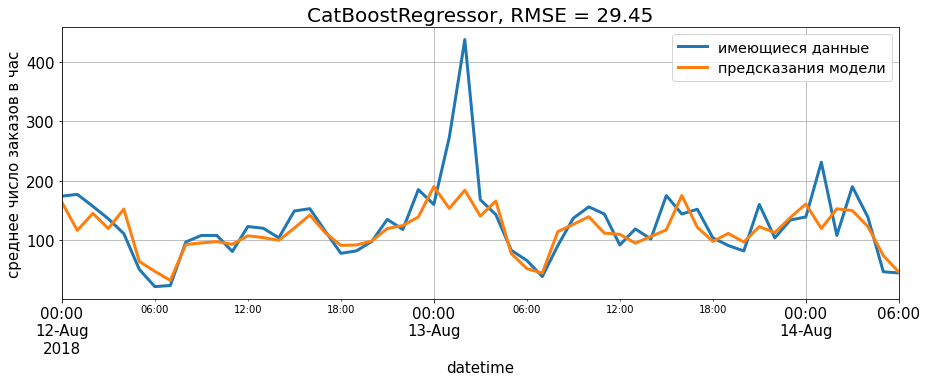

In [51]:
series_cbr = pd.Series(data=predictions_cbr, index=target_valid_cat.index)

plt.figure(figsize=(15, 5))

target_valid_cat['2018-08-12':'2018-08-14'].plot(grid=True, label='имеющиеся данные', \
                                                 linewidth = 3)
series_cbr['2018-08-12':'2018-08-14'].plot(grid=True, label='предсказания модели',\
                                           linewidth = 3)

plt.title(f'CatBoostRegressor, RMSE = {rmse_cbr_val}', size = 20)
plt.xlabel('datetime', size = 15)
plt.ylabel('среднее число заказов в час', size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(loc='upper right', fontsize='x-large')
plt.show()

### LGBMRegressor

In [52]:
#установим тип 'category' для категориальных признаков
features_train_cat[cat_columns] = features_train_cat[cat_columns].astype('category')
features_valid_cat[cat_columns] = features_valid_cat[cat_columns].astype('category')
features_test_cat[cat_columns] = features_test_cat[cat_columns].astype('category')

In [53]:
#гиперпараметры для поиска лучшей модели
learning_rate = [0.03, 0.1]

In [54]:
#гиперпараметры для поиска лучшей модели
max_depth = [4, 8]

Из документации на LGMR (https://lightgbm.readthedocs.io/en/v3.3.2/pythonapi/lightgbm.LGBMRegressor.html)

'learning_rate' - (float, необязательно (по умолчанию = 0.1)) - повышение скорости обучения
'max_depth' - (int, необязательно (по умолчанию=1)) - максимальная глубина дерева

In [55]:
%%time
param_lgb = []
best_rmse = 50

for rate in learning_rate:
    for depth_lgb in max_depth:
        lgb = LGBMRegressor(random_state = 12345, n_estimators=100,\
                            learning_rate=rate, max_depth=depth)
        lgb.fit(features_train_cat, target_train_cat)
        predictions_lgb = lgb.predict(features_valid_cat)
        rmse = def_rmse(target_valid_cat, predictions_cbr)

        if rmse < best_rmse:
            best_rmse = rmse
            best_rate = rate
            best_depth_lgb = depth_lgb
            
print(f'LGBMRegressor = {round(best_rmse,2)}, best_rate = {best_rate}, best_depth = {best_depth_lgb}') 

LGBMRegressor = 29.45, best_rate = 0.03, best_depth = 4
CPU times: user 15min 15s, sys: 6.39 s, total: 15min 21s
Wall time: 15min 27s


In [56]:
#лучшая модель LGBMRegressor
lgb = LGBMRegressor(random_state = 12345, n_estimators=100, learning_rate=best_rate, \
                    max_depth=best_depth_lgb)

Построим графики числа заказов по имеющимся данным и данным предсказаным моделью на валидационной выборке

In [57]:
%%time
lgb.fit(features_train_cat, target_train_cat)

CPU times: user 2min 2s, sys: 917 ms, total: 2min 3s
Wall time: 2min 4s


LGBMRegressor(learning_rate=0.03, max_depth=4, random_state=12345)

In [58]:
%%time
predictions_lgb = lgb.predict(features_valid_cat)

CPU times: user 53.2 ms, sys: 3.89 ms, total: 57.1 ms
Wall time: 71.8 ms


In [59]:
rmse_lgb_val = round(def_rmse(target_valid_cat, predictions_lgb),2)

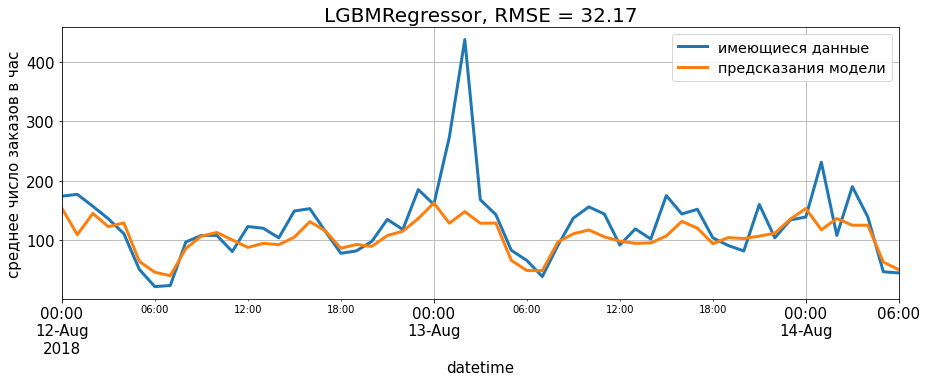

In [60]:
series_lgb = pd.Series(data=predictions_lgb, index=target_valid_cat.index)

plt.figure(figsize=(15, 5))

target_valid_cat['2018-08-12':'2018-08-14'].plot(grid=True, label='имеющиеся данные', \
                                                 linewidth = 3)
series_lgb['2018-08-12':'2018-08-14'].plot(grid=True, label='предсказания модели',\
                                           linewidth = 3)

plt.title(f'LGBMRegressor, RMSE = {rmse_lgb_val}', size = 20)
plt.xlabel('datetime', size = 15)
plt.ylabel('среднее число заказов в час', size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(loc='upper right', fontsize='x-large')
plt.show()

### RandomForestRegressor

In [61]:
max_depth_rf = [10, 25, 40]

In [62]:
%%time
param_rf = []
best_rmse = 50

for depth in max_depth_rf:
    rf = RandomForestRegressor(random_state=12345, n_estimators=100, max_depth=depth)
    rf.fit(features_train, target_train)
    predictions_rf = rf.predict(features_valid)
    rmse = def_rmse(target_valid, predictions_rf)
    if rmse < best_rmse:
        best_rmse = rmse
        best_depth_rf = depth
            
print(f'RandomForestRegressor = {round(best_rmse,2)}, best_depth = {best_depth_rf}')   

RandomForestRegressor = 31.11, best_depth = 25
CPU times: user 1min 14s, sys: 198 ms, total: 1min 14s
Wall time: 1min 15s


In [63]:
rf = RandomForestRegressor(random_state=12345, n_estimators=100, max_depth=best_depth_rf)

Построим графики числа заказов по имеющимся данным и данным предсказаным моделью на валидационной выборке

In [64]:
%%time
rf.fit(features_train, target_train)

CPU times: user 27.7 s, sys: 76.5 ms, total: 27.8 s
Wall time: 27.8 s


RandomForestRegressor(max_depth=25, random_state=12345)

In [65]:
%%time
predictions_rf = rf.predict(features_valid)

CPU times: user 13.5 ms, sys: 7.6 ms, total: 21.1 ms
Wall time: 19.7 ms


In [66]:
rmse_rf_val = round(def_rmse(target_valid, predictions_rf),2)

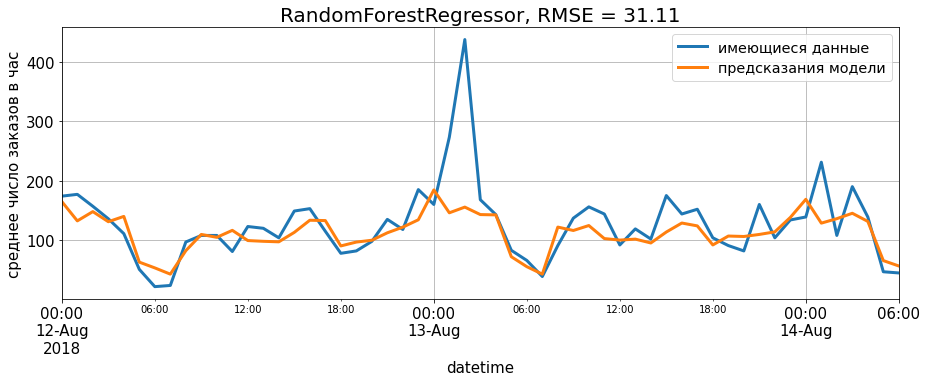

In [67]:
series_rf = pd.Series(data=predictions_rf, index=target_valid.index)

plt.figure(figsize=(15, 5))

target_valid['2018-08-12':'2018-08-14'].plot(grid=True, label='имеющиеся данные', \
                                             linewidth = 3)
series_rf['2018-08-12':'2018-08-14'].plot(grid=True, label='предсказания модели', \
                                          linewidth = 3)

plt.title(f'RandomForestRegressor, RMSE = {rmse_rf_val}', size = 20)
plt.xlabel('datetime', size = 15)
plt.ylabel('среднее число заказов в час', size = 15)
plt.legend(loc='upper right', fontsize='x-large')
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

### LinearRegression

In [68]:
lr = LinearRegression()

In [69]:
%%time
lr.fit(features_train, target_train)

CPU times: user 216 ms, sys: 541 ms, total: 757 ms
Wall time: 751 ms


LinearRegression()

In [70]:
%%time
predictions_lr = lr.predict(features_valid)

CPU times: user 13.9 ms, sys: 101 ms, total: 115 ms
Wall time: 113 ms


In [71]:
rmse_lr = round(def_rmse(target_valid, predictions_lr),2)
print('RMSE на валидационной выборке =', rmse_lr)

RMSE на валидационной выборке = 30.82


Построим графики числа заказов по имеющимся данным и данным предсказаным моделью на валидационной выборке

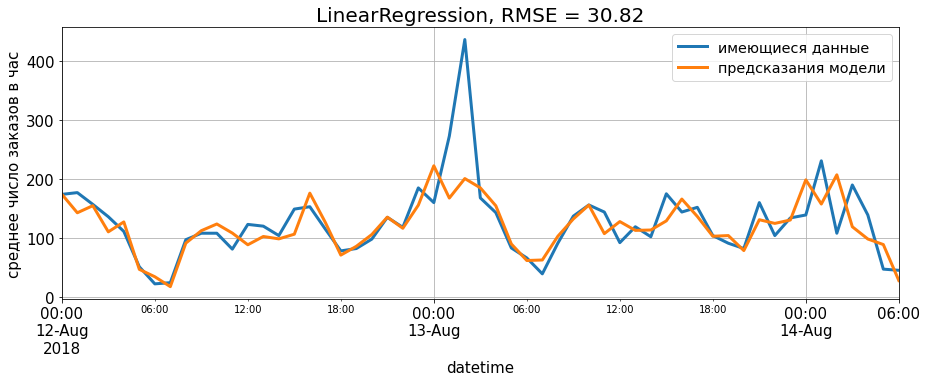

In [72]:
series_lr = pd.Series(data=predictions_lr, index=target_valid.index)

plt.figure(figsize=(15, 5))

target_valid['2018-08-12':'2018-08-14'].plot(grid=True, label='имеющиеся данные', \
                                             linewidth = 3)
series_lr['2018-08-12':'2018-08-14'].plot(grid=True, label='предсказания модели', \
                                          linewidth = 3)

plt.title(f'LinearRegression, RMSE = {rmse_lr}', size = 20)
plt.xlabel('datetime', size = 15)
plt.ylabel('среднее число заказов в час', size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(loc='upper right', fontsize='x-large')
plt.show()

### Вывод по разделу 3

В данном разделе были рассмотрены четыре модели: CatBoostRegressor, LGBMRegressor,  RandomForestRegressor и LinearRegression.  
  
Параметры моделей и оценка качества предсказаний RMSE проведены с использованием созданной валидационной выборки.  
  
Модели показали следующие результаты на валидационной выборке:  
**лучшая модель CatBoostRegressor**
CatBoostRegressor(l2_leaf_reg=0.03, depth=8, cat_features=cat_columns)
- RMSE = 29.45
- Время обучения: CPU times: user 2.73 s, sys: 15.7 ms, total: 2.75 s, Wall time: 2.79 s  
- Время предсказания: CPU times: user 5.05 ms, sys: 66 µs, total: 5.11 ms, Wall time: 4.18 ms  
  
**лучшая модель LGBMRegressor**
LGBMRegressor(n_estimators=100, learning_rate=0.03, max_depth=4)
- RMSE = 32.17
- Время обучения: CPU times: user 2.73 s, sys: 15.7 ms, total: 2.75 s, Wall time: 2.79 s  
- Время предсказания: CPU times: user 24.7 ms, sys: 0 ns, total: 24.7 ms, Wall time: 16.7 ms    
  
**лучшая модель RandomForestRegressor**  
RandomForestRegressor(n_estimators=100, max_depth=best_depth_rf)  
- RMSE = 31.11
- Время обучения: CPU times: user 24.6 s, sys: 9.94 ms, total: 24.6 s, Wall time: 24.8 s
- Время предсказания: CPU times: user 19.4 ms, sys: 0 ns, total: 19.4 ms, Wall time: 18.1 ms   
  
**модель LinearRegression**  
LinearRegression()   
- RMSE = 30.82
- Время обучения: CPU times: user 143 ms, sys: 95.2 ms, total: 238 ms, Wall time: 161 ms
- Время предсказания: CPU times: user 3.13 ms, sys: 192 µs, total: 3.32 ms, Wall time: 572 µs 

По качеству предсказания лучшая модель CatBoostRegressor, по скорости обучения LinearRegression, по скорости предсказания LinearRegression.
  
Модели LinearRegression и CatBoostRegressor показали схожие по качеству результаты на валидационной выборке. По скорости обучения и предсказания модель LinearRegression значительно превосходит модель CatBoostRegressor.
  
Лучшая модель определена по значению RMSE на валидационной выборке, а также по скорости обучения и предсказания - LinearRegression()

## Тестирование

Проверим выбранную модель на тестовой выборке 

In [73]:
%%time
lr.fit(features_train_valid, target_train_valid)

CPU times: user 259 ms, sys: 884 ms, total: 1.14 s
Wall time: 1.12 s


LinearRegression()

In [74]:
%%time
predictions_test = lr.predict(features_test)

CPU times: user 21.2 ms, sys: 66.3 ms, total: 87.5 ms
Wall time: 109 ms


In [75]:
rmse_rf_test = round(def_rmse(target_test, predictions_test),2)
print('RMSE на тестовой выборке =', rmse_rf_test)

RMSE на тестовой выборке = 38.4


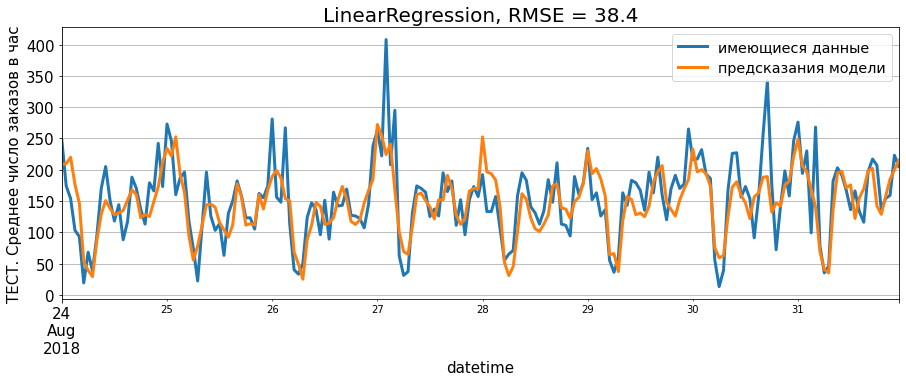

In [76]:
series_lr = pd.Series(data=predictions_test, index=target_test.index)

plt.figure(figsize=(15, 5))

target_test['2018-08-24':'2018-08-31'].plot(grid=True, label='имеющиеся данные', \
                                             linewidth = 3)
series_lr['2018-08-24':'2018-08-31'].plot(grid=True, label='предсказания модели', \
                                          linewidth = 3)

plt.title(f'LinearRegression, RMSE = {rmse_rf_test}', size = 20)
plt.xlabel('datetime', size = 15)
plt.ylabel('ТЕСТ. Среднее число заказов в час', size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(loc='upper right', fontsize='x-large')
plt.show()

### Проверка модели на адекватность

Предскажем следующее значение предыдущим и посчитаем RMSE

In [77]:
pred_previous = target_test.shift()
pred_previous.iloc[0] = target_train.iloc[-1]

In [78]:
rmse_dummy = round(def_rmse(target_test, pred_previous),2)
print('RMSE на тестовой выборке =', rmse_dummy)

RMSE на тестовой выборке = 58.84


Построенная модель прошла проверку на адекватность

## Общий вывод

Для достижения поставленной цели построения модели, способной прогнозировать количество заказов такси на следующий час было выполнено следующее.

1) В разделе 1. Проведена загрузка данных и первичное ознакомление с ними. Количество строк в датасете составило 26496 строк. Данные охватывают период времени с 2018-03-01 00:00:00 по 2018-08-31 23:50:00. Исходные данные имеют шаг по времени равный 10 минутам.

2) В разделе 2.
- проведено ресемплирование данных до 1 часа;  
- построен график зависимости числа заказов от времени суток для разных дней недели. Количество заказаов достигает пика в районе 00:00, 10:00, 17:00. Количество "ночных заказов" минимально для воскресения и вторника, а максимально для субботы и понедельника.   
- построен график зависимости числа заказов от времени суток для разных месяцев. Из графика видно, что среднее число заказов возрастает от марта к августу. При этом, положение экстремумов количества заказов по времени в течении суток сохраняется.
- построены графики тренда, сезонности и шума.  
-  определена оптимальная ширина окна скользящего среднего и количество отстающих значений.  
- данные очищены от пропусков.  

3) В разделе 3 по качеству прогноза на валидационной выборке была определена лучшая модель LinearRegression().

Результаты модели на валидационной выборке.

RMSE = 30.82
Время обучения: CPU times: user 143 ms, sys: 95.2 ms, total: 238 ms, Wall time: 161 ms  
Время предсказания: CPU times: user 3.13 ms, sys: 192 µs, total: 3.32 ms, Wall time: 572 µs  

4) В разделе 4 выбранная модель была проверена на тестовой выборке. RMSE на тестовой выборке = 38.4

Полученный результат на валидационной и тестовой выборке удовлетворяет поставленной задаче

## Дополнение. Кросс-валидация на временных рядах и проверка ряда на стационарность

In [85]:
rmse_scor = make_scorer(def_rmse, greater_is_better=False)

In [86]:
tscv = TimeSeriesSplit(n_splits=10)

In [87]:
param_rf={'max_depth':range(25,36,5), 'n_estimators':range(90,101,10)}

In [88]:
rf_model = RandomForestRegressor(random_state=12345, n_jobs=-1)

In [91]:
grid_rf = GridSearchCV(estimator=rf_model, cv=tscv, param_grid=param_rf, scoring = rmse_scor)
grid_rf.fit(features_train_valid, target_train_valid)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=10, test_size=None),
             estimator=RandomForestRegressor(n_jobs=-1, random_state=12345),
             param_grid={'max_depth': range(25, 36, 5),
                         'n_estimators': range(90, 101, 10)},
             scoring=make_scorer(def_rmse, greater_is_better=False))

In [92]:
print('Лучшие гиперпараметры', grid_rf.best_params_)
print('Максимальное значение RMSE = ', grid_rf.best_score_)

Лучшие гиперпараметры {'max_depth': 35, 'n_estimators': 100}
Максимальное значение RMSE =  -23.13087875169578


In [ ]:
#Проверка временного ряда на стационарность
from statsmodels.tsa.stattools import adfuller

ts = data['num_orders']
st_test = adfuller(ts, regression='ctt')

print('Если значение с индексом 1 меньше P-Value, заданное нами (обычно берут 0.05), то ряд стационарный')
if st_test[1] < 0.05:
    print('Наш ряд стационарный')
else:
    print('Ряд нестационарный')

